In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import functions
import os

#for detection/segmentation
# !pip install ultralytics
from ultralytics import YOLO

In [31]:
seg_model = YOLO("yolov8l-seg.pt")

In [34]:
path_classes = ["Green", "Yellowish_Green", "Midripen", "Overripen"]
path_folder = "dataset_saranya2021"
path_newfoler = "segcrop_dataset_saranya2021"

#seg_model()

for rel_path_class in path_classes:
    seg_model.predict()
    path_class = os.path.join(path_folder, rel_path_class)
    for rel_image_path in os.listdir(path_class):
        image_path = os.path.join(path_class, rel_image_path)
        image = plt.imread(image_path)
        result = seg_model(image)[0]
        boxes_classes = result.boxes.cls.numpy()
        banana_box_idx = np.where(boxes_classes == 46.)[0]
        if banana_box_idx.size != 1:
            continue
        mask = np.zeros_like(image)
        mask = cv2.drawContours(mask, [result.masks.xy[0].astype(int)], 0, (255,255,255), -1)
        xyxy = result.boxes.xyxy[0].numpy().astype(int)
        seg_image = mask & image
        crop_image = seg_image[xyxy[1]:xyxy[3], xyxy[0]:xyxy[2] ]
        newpath = os.path.join(path_newfoler, rel_path_class, rel_image_path)
        plt.imsave(newpath, crop_image)
        print(newpath)

WARNING ⚠️ 'source' is missing. Using 'source=https://ultralytics.com/images/bus.jpg'.

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /Users/dinisrocha/Documents/pmba/PMBA_project/bus.jpg: 640x480 5 persons, 1 bus, 1 stop sign, 1 tie, 2502.9ms
Speed: 4.8ms preprocess, 2502.9ms inference, 14.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 banana, 1776.0ms
Speed: 16.0ms preprocess, 1776.0ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g057.jpg


0: 384x640 1 banana, 1893.9ms
Speed: 7.2ms preprocess, 1893.9ms inference, 11.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g043.jpg


0: 384x640 1 banana, 1971.3ms
Speed: 16.9ms preprocess, 1971.3ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g094.jpg


0: 384x640 1 banana, 2355.9ms
Speed: 8.3ms preprocess, 2355.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g080.jpg


0: 384x640 1 banana, 3197.9ms
Speed: 9.0ms preprocess, 3197.9ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g081.jpg


0: 384x640 1 banana, 3221.6ms
Speed: 9.1ms preprocess, 3221.6ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g095.jpg


0: 384x640 1 banana, 2289.8ms
Speed: 7.4ms preprocess, 2289.8ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g042.jpg


0: 384x640 1 banana, 2228.6ms
Speed: 10.6ms preprocess, 2228.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g056.jpg


0: 384x640 1 banana, 1611.8ms
Speed: 9.3ms preprocess, 1611.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g068.jpg


0: 384x640 1 banana, 1987.4ms
Speed: 5.6ms preprocess, 1987.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g040.jpg


0: 384x640 1 banana, 2642.5ms
Speed: 7.3ms preprocess, 2642.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g054.jpg


0: 384x640 1 banana, 2219.3ms
Speed: 7.7ms preprocess, 2219.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g083.jpg


0: 384x640 1 banana, 2730.7ms
Speed: 11.7ms preprocess, 2730.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g097.jpg


0: 384x640 1 banana, 2240.0ms
Speed: 10.5ms preprocess, 2240.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g096.jpg


0: 384x640 1 banana, 3320.2ms
Speed: 8.2ms preprocess, 3320.2ms inference, 15.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g082.jpg


0: 384x640 1 banana, 3955.4ms
Speed: 24.2ms preprocess, 3955.4ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g055.jpg


0: 384x640 1 banana, 2267.6ms
Speed: 6.8ms preprocess, 2267.6ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g041.jpg


0: 384x640 1 banana, 2398.7ms
Speed: 8.7ms preprocess, 2398.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g069.jpg


0: 384x640 1 banana, 2034.1ms
Speed: 10.0ms preprocess, 2034.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g045.jpg


0: 384x640 1 banana, 2086.5ms
Speed: 4.6ms preprocess, 2086.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g051.jpg


0: 384x640 1 banana, 2015.1ms
Speed: 5.3ms preprocess, 2015.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g079.jpg


0: 384x640 1 banana, 2133.2ms
Speed: 7.0ms preprocess, 2133.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g086.jpg


0: 384x640 1 banana, 2417.0ms
Speed: 8.9ms preprocess, 2417.0ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g092.jpg


0: 384x640 1 banana, 2706.9ms
Speed: 5.4ms preprocess, 2706.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g093.jpg


0: 384x640 1 banana, 2356.4ms
Speed: 27.9ms preprocess, 2356.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g087.jpg


0: 384x640 1 banana, 2257.7ms
Speed: 5.3ms preprocess, 2257.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g078.jpg


0: 384x640 1 banana, 2409.5ms
Speed: 8.6ms preprocess, 2409.5ms inference, 15.0ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g050.jpg


0: 384x640 1 banana, 4068.1ms
Speed: 21.7ms preprocess, 4068.1ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g044.jpg


0: 384x640 1 banana, 3148.9ms
Speed: 11.5ms preprocess, 3148.9ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g052.jpg


0: 384x640 1 banana, 4369.3ms
Speed: 10.2ms preprocess, 4369.3ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g046.jpg


0: 384x640 1 banana, 2713.0ms
Speed: 6.7ms preprocess, 2713.0ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g091.jpg


0: 384x640 1 banana, 2247.6ms
Speed: 13.4ms preprocess, 2247.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g085.jpg


0: 384x640 1 banana, 2366.6ms
Speed: 8.7ms preprocess, 2366.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g084.jpg


0: 384x640 1 banana, 2030.9ms
Speed: 7.3ms preprocess, 2030.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g090.jpg


0: 384x640 1 banana, 2460.2ms
Speed: 5.9ms preprocess, 2460.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g047.jpg


0: 384x640 1 banana, 2183.4ms
Speed: 8.7ms preprocess, 2183.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g053.jpg


0: 384x640 1 banana, 3535.3ms
Speed: 7.1ms preprocess, 3535.3ms inference, 17.0ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g008.jpg


0: 384x640 1 banana, 3500.6ms
Speed: 27.1ms preprocess, 3500.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g034.jpg


0: 384x640 1 banana, 2964.2ms
Speed: 10.4ms preprocess, 2964.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g020.jpg


0: 384x640 1 banana, 2923.9ms
Speed: 5.2ms preprocess, 2923.9ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g021.jpg


0: 384x640 1 banana, 2693.6ms
Speed: 8.2ms preprocess, 2693.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g035.jpg


0: 384x640 1 banana, 2831.8ms
Speed: 5.9ms preprocess, 2831.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g009.jpg


0: 384x640 1 banana, 1764.8ms
Speed: 11.6ms preprocess, 1764.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g023.jpg


0: 384x640 1 banana, 1848.5ms
Speed: 5.5ms preprocess, 1848.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g037.jpg


0: 384x640 1 banana, 2090.5ms
Speed: 14.4ms preprocess, 2090.5ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g036.jpg


0: 384x640 1 banana, 2447.3ms
Speed: 8.7ms preprocess, 2447.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g022.jpg


0: 384x640 1 banana, 1651.2ms
Speed: 9.5ms preprocess, 1651.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g026.jpg


0: 384x640 1 banana, 1448.9ms
Speed: 6.4ms preprocess, 1448.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g032.jpg


0: 384x640 1 banana, 1453.0ms
Speed: 5.6ms preprocess, 1453.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g033.jpg


0: 384x640 1 banana, 3641.1ms
Speed: 5.5ms preprocess, 3641.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g027.jpg


0: 384x640 1 banana, 2396.8ms
Speed: 7.4ms preprocess, 2396.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g031.jpg


0: 384x640 1 banana, 2367.4ms
Speed: 15.3ms preprocess, 2367.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g025.jpg


0: 384x640 1 banana, 2764.5ms
Speed: 8.2ms preprocess, 2764.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g019.jpg


0: 384x640 1 banana, 2521.2ms
Speed: 9.5ms preprocess, 2521.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g018.jpg


0: 384x640 1 banana, 1834.4ms
Speed: 38.2ms preprocess, 1834.4ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g024.jpg


0: 384x640 1 banana, 2782.0ms
Speed: 6.2ms preprocess, 2782.0ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g030.jpg


0: 384x640 1 banana, 2841.2ms
Speed: 7.0ms preprocess, 2841.2ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g029.jpg


0: 384x640 1 banana, 2520.4ms
Speed: 19.4ms preprocess, 2520.4ms inference, 34.7ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g015.jpg


0: 384x640 1 banana, 5357.4ms
Speed: 9.0ms preprocess, 5357.4ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g001.jpg


0: 384x640 1 banana, 4721.3ms
Speed: 11.8ms preprocess, 4721.3ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g014.jpg


0: 384x640 1 banana, 1868.5ms
Speed: 20.0ms preprocess, 1868.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g028.jpg


0: 384x640 1 banana, 2080.7ms
Speed: 7.2ms preprocess, 2080.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g002.jpg


0: 384x640 1 banana, 2954.0ms
Speed: 5.3ms preprocess, 2954.0ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g016.jpg


0: 384x640 1 banana, 2464.7ms
Speed: 4.0ms preprocess, 2464.7ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g017.jpg


0: 384x640 1 banana, 3633.2ms
Speed: 44.6ms preprocess, 3633.2ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g003.jpg


0: 384x640 1 banana, 2341.2ms
Speed: 8.5ms preprocess, 2341.2ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g007.jpg


0: 384x640 1 banana, 3668.9ms
Speed: 9.0ms preprocess, 3668.9ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g013.jpg


0: 384x640 1 banana, 2002.7ms
Speed: 21.0ms preprocess, 2002.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g012.jpg


0: 384x640 1 banana, 4563.5ms
Speed: 7.4ms preprocess, 4563.5ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g006.jpg


0: 384x640 1 banana, 2614.9ms
Speed: 11.2ms preprocess, 2614.9ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g010.jpg


0: 384x640 1 banana, 2544.3ms
Speed: 9.6ms preprocess, 2544.3ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g004.jpg


0: 384x640 1 banana, 2555.4ms
Speed: 9.6ms preprocess, 2555.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g038.jpg


0: 384x640 1 banana, 2537.8ms
Speed: 9.2ms preprocess, 2537.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g039.jpg


0: 384x640 1 banana, 1835.9ms
Speed: 9.0ms preprocess, 1835.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g005.jpg


0: 384x640 1 banana, 2236.1ms
Speed: 9.2ms preprocess, 2236.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g011.jpg


0: 384x640 1 banana, 1731.3ms
Speed: 14.5ms preprocess, 1731.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g076.jpg


0: 384x640 1 banana, 1725.7ms
Speed: 6.8ms preprocess, 1725.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g062.jpg


0: 384x640 1 banana, 1940.4ms
Speed: 6.3ms preprocess, 1940.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g089.jpg


0: 384x640 1 banana, 1754.2ms
Speed: 6.7ms preprocess, 1754.2ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g102.jpg


0: 384x640 1 banana, 1699.5ms
Speed: 9.0ms preprocess, 1699.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g103.jpg


0: 384x640 1 banana, 2051.9ms
Speed: 9.0ms preprocess, 2051.9ms inference, 14.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g088.jpg


0: 384x640 1 banana, 1830.5ms
Speed: 6.4ms preprocess, 1830.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g063.jpg


0: 384x640 1 banana, 2464.4ms
Speed: 7.0ms preprocess, 2464.4ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g077.jpg


0: 384x640 1 banana, 1910.1ms
Speed: 10.7ms preprocess, 1910.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g049.jpg


0: 384x640 1 banana, 1817.7ms
Speed: 6.1ms preprocess, 1817.7ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g061.jpg


0: 384x640 1 banana, 1818.2ms
Speed: 17.1ms preprocess, 1818.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g075.jpg


0: 384x640 1 banana, 1724.9ms
Speed: 6.8ms preprocess, 1724.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g101.jpg


0: 384x640 1 banana, 1978.6ms
Speed: 9.8ms preprocess, 1978.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g100.jpg


0: 384x640 1 banana, 1768.4ms
Speed: 7.9ms preprocess, 1768.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g074.jpg


0: 384x640 1 banana, 1895.3ms
Speed: 6.3ms preprocess, 1895.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g060.jpg


0: 384x640 1 banana, 1845.5ms
Speed: 14.1ms preprocess, 1845.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g048.jpg


0: 384x640 1 banana, 1745.7ms
Speed: 15.6ms preprocess, 1745.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g064.jpg


0: 384x640 1 banana, 1711.0ms
Speed: 8.9ms preprocess, 1711.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g070.jpg


0: 384x640 1 banana, 1876.7ms
Speed: 7.5ms preprocess, 1876.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g058.jpg


0: 384x640 1 banana, 1728.8ms
Speed: 8.7ms preprocess, 1728.8ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g104.jpg


0: 384x640 1 banana, 1689.4ms
Speed: 10.4ms preprocess, 1689.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g059.jpg


0: 384x640 1 banana, 2178.4ms
Speed: 6.9ms preprocess, 2178.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g071.jpg


0: 384x640 1 banana, 1750.6ms
Speed: 11.3ms preprocess, 1750.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g065.jpg


0: 384x640 1 banana, 2405.6ms
Speed: 15.3ms preprocess, 2405.6ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g073.jpg


0: 384x640 1 banana, 1885.1ms
Speed: 10.4ms preprocess, 1885.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g067.jpg


0: 384x640 1 banana, 1712.6ms
Speed: 14.1ms preprocess, 1712.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g098.jpg


0: 384x640 1 banana, 3151.9ms
Speed: 6.1ms preprocess, 3151.9ms inference, 8.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g099.jpg


0: 384x640 1 banana, 4401.3ms
Speed: 7.3ms preprocess, 4401.3ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Green/g066.jpg


0: 384x640 1 banana, 3406.1ms
Speed: 10.9ms preprocess, 3406.1ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=https://ultralytics.com/images/bus.jpg'.

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg


segcrop_dataset_saranya2021/Green/g072.jpg


image 1/1 /Users/dinisrocha/Documents/pmba/PMBA_project/bus.jpg: 640x480 5 persons, 1 bus, 1 stop sign, 1 tie, 3507.7ms
Speed: 8.2ms preprocess, 3507.7ms inference, 21.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 banana, 1984.0ms
Speed: 34.0ms preprocess, 1984.0ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y023.jpg


0: 384x640 1 banana, 2358.0ms
Speed: 9.5ms preprocess, 2358.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y037.jpg


0: 384x640 1 banana, 1875.8ms
Speed: 7.2ms preprocess, 1875.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y036.jpg


0: 384x640 1 banana, 1675.1ms
Speed: 5.5ms preprocess, 1675.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y022.jpg


0: 384x640 1 banana, 2307.4ms
Speed: 7.2ms preprocess, 2307.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y008.jpg


0: 384x640 1 banana, 1954.3ms
Speed: 6.8ms preprocess, 1954.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y034.jpg


0: 384x640 1 banana, 2806.8ms
Speed: 5.0ms preprocess, 2806.8ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y020.jpg


0: 384x640 1 banana, 3238.1ms
Speed: 29.3ms preprocess, 3238.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y021.jpg


0: 384x640 1 banana, 2301.6ms
Speed: 9.6ms preprocess, 2301.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y035.jpg


0: 384x640 1 banana, 2289.8ms
Speed: 8.8ms preprocess, 2289.8ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y009.jpg


0: 384x640 1 banana, 2933.0ms
Speed: 7.1ms preprocess, 2933.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y031.jpg


0: 384x640 1 banana, 2108.9ms
Speed: 6.6ms preprocess, 2108.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y025.jpg


0: 384x640 1 banana, 3132.2ms
Speed: 8.0ms preprocess, 3132.2ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y019.jpg


0: 384x640 1 banana, 2451.1ms
Speed: 39.8ms preprocess, 2451.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y018.jpg


0: 384x640 1 banana, 1941.5ms
Speed: 10.5ms preprocess, 1941.5ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y024.jpg


0: 384x640 1 banana, 2221.8ms
Speed: 28.2ms preprocess, 2221.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y030.jpg


0: 384x640 1 banana, 3595.8ms
Speed: 23.4ms preprocess, 3595.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y026.jpg


0: 384x640 1 banana, 2075.3ms
Speed: 12.2ms preprocess, 2075.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y032.jpg


0: 384x640 1 banana, 2370.0ms
Speed: 7.8ms preprocess, 2370.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y033.jpg


0: 384x640 1 banana, 2008.4ms
Speed: 12.2ms preprocess, 2008.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y027.jpg


0: 384x640 1 banana, 2011.8ms
Speed: 8.5ms preprocess, 2011.8ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y040.jpg


0: 384x640 1 banana, 2154.6ms
Speed: 13.3ms preprocess, 2154.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y041.jpg


0: 384x640 1 banana, 1955.8ms
Speed: 10.0ms preprocess, 1955.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y043.jpg


0: 384x640 1 banana, 2129.5ms
Speed: 7.6ms preprocess, 2129.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y042.jpg


0: 384x640 1 banana, 1986.2ms
Speed: 8.3ms preprocess, 1986.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y046.jpg


0: 384x640 1 banana, 2172.0ms
Speed: 8.7ms preprocess, 2172.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y047.jpg


0: 384x640 1 banana, 2106.2ms
Speed: 21.7ms preprocess, 2106.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y045.jpg


0: 384x640 1 banana, 1971.5ms
Speed: 8.5ms preprocess, 1971.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y044.jpg


0: 384x640 1 banana, 2177.6ms
Speed: 6.3ms preprocess, 2177.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y048.jpg


0: 384x640 1 banana, 2764.9ms
Speed: 9.5ms preprocess, 2764.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y002.jpg


0: 384x640 1 banana, 2338.1ms
Speed: 6.7ms preprocess, 2338.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y016.jpg


0: 384x640 1 banana, 2056.6ms
Speed: 11.5ms preprocess, 2056.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y017.jpg


0: 384x640 1 banana, 2321.6ms
Speed: 8.5ms preprocess, 2321.6ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y003.jpg


0: 384x640 1 banana, 1968.4ms
Speed: 9.6ms preprocess, 1968.4ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y029.jpg


0: 384x640 1 banana, 2136.9ms
Speed: 8.0ms preprocess, 2136.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y015.jpg


0: 384x640 1 banana, 2118.2ms
Speed: 11.4ms preprocess, 2118.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y001.jpg


0: 384x640 1 banana, 1993.4ms
Speed: 19.9ms preprocess, 1993.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y014.jpg


0: 384x640 1 banana, 2131.8ms
Speed: 5.8ms preprocess, 2131.8ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y028.jpg


0: 384x640 1 banana, 3296.9ms
Speed: 42.2ms preprocess, 3296.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y010.jpg


0: 384x640 1 banana, 1975.9ms
Speed: 9.9ms preprocess, 1975.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y004.jpg


0: 384x640 1 banana, 2208.8ms
Speed: 7.3ms preprocess, 2208.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y038.jpg


0: 384x640 1 banana, 1645.2ms
Speed: 7.3ms preprocess, 1645.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y039.jpg


0: 384x640 1 banana, 5163.1ms
Speed: 8.4ms preprocess, 5163.1ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y005.jpg


0: 384x640 1 banana, 1973.4ms
Speed: 12.6ms preprocess, 1973.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y011.jpg


0: 384x640 1 banana, 1420.0ms
Speed: 7.1ms preprocess, 1420.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y007.jpg


0: 384x640 1 banana, 1367.3ms
Speed: 5.5ms preprocess, 1367.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y013.jpg


0: 384x640 1 banana, 1405.9ms
Speed: 6.4ms preprocess, 1405.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Yellowish_Green/y012.jpg


0: 384x640 1 banana, 1737.4ms
Speed: 5.8ms preprocess, 1737.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=https://ultralytics.com/images/bus.jpg'.

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg


segcrop_dataset_saranya2021/Yellowish_Green/y006.jpg


image 1/1 /Users/dinisrocha/Documents/pmba/PMBA_project/bus.jpg: 640x480 5 persons, 1 bus, 1 stop sign, 1 tie, 3099.3ms
Speed: 6.6ms preprocess, 3099.3ms inference, 15.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 banana, 1876.4ms
Speed: 7.9ms preprocess, 1876.4ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m022.jpg


0: 384x640 1 banana, 2950.6ms
Speed: 5.3ms preprocess, 2950.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m036.jpg


0: 384x640 1 banana, 3304.3ms
Speed: 9.7ms preprocess, 3304.3ms inference, 10.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m037.jpg


0: 384x640 1 banana, 3103.8ms
Speed: 7.4ms preprocess, 3103.8ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m023.jpg


0: 384x640 1 banana, 4051.6ms
Speed: 20.6ms preprocess, 4051.6ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m035.jpg


0: 384x640 1 banana, 4032.2ms
Speed: 14.6ms preprocess, 4032.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m021.jpg


0: 384x640 1 banana, 2372.1ms
Speed: 8.4ms preprocess, 2372.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m009.jpg


0: 384x640 1 banana, 2589.7ms
Speed: 8.4ms preprocess, 2589.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m008.jpg


0: 384x640 1 banana, 2204.5ms
Speed: 5.7ms preprocess, 2204.5ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m020.jpg


0: 384x640 1 banana, 2180.2ms
Speed: 10.6ms preprocess, 2180.2ms inference, 10.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m034.jpg


0: 384x640 1 banana, 2816.3ms
Speed: 18.2ms preprocess, 2816.3ms inference, 13.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m018.jpg


0: 384x640 1 banana, 3651.9ms
Speed: 14.0ms preprocess, 3651.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m030.jpg


0: 384x640 1 banana, 2771.4ms
Speed: 15.1ms preprocess, 2771.4ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m024.jpg


0: 384x640 1 banana, 2361.7ms
Speed: 17.5ms preprocess, 2361.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m025.jpg


0: 384x640 1 banana, 2146.1ms
Speed: 25.2ms preprocess, 2146.1ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m031.jpg


0: 384x640 1 banana, 3356.8ms
Speed: 23.4ms preprocess, 3356.8ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m019.jpg


0: 384x640 1 banana, 2413.9ms
Speed: 9.9ms preprocess, 2413.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m027.jpg


0: 384x640 1 banana, 2090.3ms
Speed: 24.1ms preprocess, 2090.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m033.jpg


0: 384x640 1 banana, 1737.1ms
Speed: 15.3ms preprocess, 1737.1ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m032.jpg


0: 384x640 1 banana, 2119.1ms
Speed: 10.8ms preprocess, 2119.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m026.jpg


0: 384x640 1 banana, 1754.5ms
Speed: 8.2ms preprocess, 1754.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m041.jpg


0: 384x640 1 banana, 1919.2ms
Speed: 7.7ms preprocess, 1919.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m055.jpg


0: 384x640 1 banana, 2319.2ms
Speed: 8.0ms preprocess, 2319.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m069.jpg


0: 384x640 1 banana, 1874.8ms
Speed: 6.9ms preprocess, 1874.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m082.jpg


0: 384x640 1 banana, 1841.2ms
Speed: 9.5ms preprocess, 1841.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m083.jpg


0: 384x640 1 banana, 2487.9ms
Speed: 7.0ms preprocess, 2487.9ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m068.jpg


0: 384x640 1 banana, 3833.6ms
Speed: 11.0ms preprocess, 3833.6ms inference, 10.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m054.jpg


0: 384x640 1 banana, 3865.8ms
Speed: 12.5ms preprocess, 3865.8ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m040.jpg


0: 384x640 1 banana, 3350.5ms
Speed: 35.8ms preprocess, 3350.5ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m056.jpg


0: 384x640 1 banana, 2665.4ms
Speed: 15.2ms preprocess, 2665.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m042.jpg


0: 384x640 1 banana, 2278.0ms
Speed: 7.0ms preprocess, 2278.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m081.jpg


0: 384x640 1 banana, 2380.2ms
Speed: 12.7ms preprocess, 2380.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m080.jpg


0: 384x640 1 banana, 1683.8ms
Speed: 12.0ms preprocess, 1683.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m043.jpg


0: 384x640 1 banana, 1717.8ms
Speed: 11.7ms preprocess, 1717.8ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m057.jpg


0: 384x640 1 banana, 1797.4ms
Speed: 20.3ms preprocess, 1797.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m053.jpg


0: 384x640 1 banana, 1720.4ms
Speed: 5.8ms preprocess, 1720.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m047.jpg


0: 384x640 1 banana, 3048.3ms
Speed: 6.6ms preprocess, 3048.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m084.jpg


0: 384x640 1 banana, 1 toothbrush, 1649.5ms
Speed: 8.0ms preprocess, 1649.5ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m085.jpg


0: 384x640 1 banana, 1424.2ms
Speed: 5.3ms preprocess, 1424.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m046.jpg


0: 384x640 1 banana, 3354.7ms
Speed: 5.5ms preprocess, 3354.7ms inference, 10.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m052.jpg


0: 384x640 1 banana, 2757.9ms
Speed: 7.8ms preprocess, 2757.9ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m078.jpg


0: 384x640 1 banana, 2080.6ms
Speed: 19.6ms preprocess, 2080.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m044.jpg


0: 384x640 1 banana, 1487.3ms
Speed: 8.2ms preprocess, 1487.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m050.jpg


0: 384x640 1 banana, 1532.4ms
Speed: 4.9ms preprocess, 1532.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m087.jpg


0: 384x640 1 banana, 1672.5ms
Speed: 5.3ms preprocess, 1672.5ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m086.jpg


0: 384x640 1 banana, 1665.0ms
Speed: 4.8ms preprocess, 1665.0ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m051.jpg


0: 384x640 1 banana, 1436.5ms
Speed: 6.2ms preprocess, 1436.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m045.jpg


0: 384x640 1 banana, 1607.3ms
Speed: 7.2ms preprocess, 1607.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m079.jpg


0: 384x640 1 banana, 1563.3ms
Speed: 5.3ms preprocess, 1563.3ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m060.jpg


0: 384x640 1 banana, 1579.3ms
Speed: 8.0ms preprocess, 1579.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m074.jpg


0: 384x640 1 banana, 1688.3ms
Speed: 6.1ms preprocess, 1688.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m048.jpg


0: 384x640 1 banana, 1637.5ms
Speed: 11.6ms preprocess, 1637.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m049.jpg


0: 384x640 1 banana, 1519.9ms
Speed: 5.8ms preprocess, 1519.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m075.jpg


0: 384x640 1 banana, 1361.1ms
Speed: 5.1ms preprocess, 1361.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m061.jpg


0: 384x640 1 banana, 1361.2ms
Speed: 5.2ms preprocess, 1361.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m077.jpg


0: 384x640 1 banana, 1494.9ms
Speed: 5.4ms preprocess, 1494.9ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m063.jpg


0: 384x640 1 banana, 1828.3ms
Speed: 5.2ms preprocess, 1828.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m088.jpg


0: 384x640 1 banana, 1643.4ms
Speed: 13.5ms preprocess, 1643.4ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m062.jpg


0: 384x640 1 banana, 1595.4ms
Speed: 6.7ms preprocess, 1595.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m076.jpg


0: 384x640 1 banana, 1684.9ms
Speed: 7.6ms preprocess, 1684.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m072.jpg


0: 384x640 1 banana, 1452.3ms
Speed: 6.3ms preprocess, 1452.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m066.jpg


0: 384x640 1 banana, 1541.5ms
Speed: 5.2ms preprocess, 1541.5ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m067.jpg


0: 384x640 1 banana, 1969.3ms
Speed: 6.1ms preprocess, 1969.3ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m073.jpg


0: 384x640 1 banana, 1543.0ms
Speed: 8.1ms preprocess, 1543.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m059.jpg


0: 384x640 1 banana, 2006.6ms
Speed: 6.1ms preprocess, 2006.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m065.jpg


0: 384x640 1 banana, 2383.7ms
Speed: 9.0ms preprocess, 2383.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m071.jpg


0: 384x640 1 banana, 2405.5ms
Speed: 7.6ms preprocess, 2405.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m070.jpg


0: 384x640 1 banana, 1910.4ms
Speed: 5.8ms preprocess, 1910.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m064.jpg


0: 384x640 1 banana, 1819.2ms
Speed: 5.5ms preprocess, 1819.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m058.jpg


0: 384x640 1 banana, 2126.9ms
Speed: 5.5ms preprocess, 2126.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m003.jpg


0: 384x640 1 banana, 3375.1ms
Speed: 5.5ms preprocess, 3375.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m017.jpg


0: 384x640 1 banana, 3651.1ms
Speed: 7.3ms preprocess, 3651.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m016.jpg


0: 384x640 1 banana, 2137.4ms
Speed: 6.9ms preprocess, 2137.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m002.jpg


0: 384x640 1 banana, 1673.3ms
Speed: 5.1ms preprocess, 1673.3ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m014.jpg


0: 384x640 1 banana, 1742.4ms
Speed: 8.9ms preprocess, 1742.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m028.jpg


0: 384x640 1 banana, 1942.6ms
Speed: 5.5ms preprocess, 1942.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m029.jpg


0: 384x640 1 banana, 1656.7ms
Speed: 5.1ms preprocess, 1656.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m001.jpg


0: 384x640 1 banana, 2788.2ms
Speed: 6.0ms preprocess, 2788.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m015.jpg


0: 384x640 1 banana, 1932.6ms
Speed: 7.8ms preprocess, 1932.6ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m039.jpg


0: 384x640 1 banana, 2151.8ms
Speed: 8.0ms preprocess, 2151.8ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m011.jpg


0: 384x640 1 banana, 2037.0ms
Speed: 8.3ms preprocess, 2037.0ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m005.jpg


0: 384x640 1 banana, 2187.7ms
Speed: 14.4ms preprocess, 2187.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m004.jpg


0: 384x640 1 banana, 2203.9ms
Speed: 8.0ms preprocess, 2203.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m010.jpg


0: 384x640 1 banana, 2548.9ms
Speed: 5.0ms preprocess, 2548.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m038.jpg


0: 384x640 1 banana, 3017.9ms
Speed: 10.3ms preprocess, 3017.9ms inference, 12.7ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m006.jpg


0: 384x640 1 banana, 2466.3ms
Speed: 26.0ms preprocess, 2466.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m012.jpg


0: 384x640 1 banana, 2516.2ms
Speed: 9.6ms preprocess, 2516.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Midripen/m013.jpg


0: 384x640 1 banana, 2131.5ms
Speed: 5.0ms preprocess, 2131.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=https://ultralytics.com/images/bus.jpg'.

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg


segcrop_dataset_saranya2021/Midripen/m007.jpg


image 1/1 /Users/dinisrocha/Documents/pmba/PMBA_project/bus.jpg: 640x480 5 persons, 1 bus, 1 stop sign, 1 tie, 2623.3ms
Speed: 4.3ms preprocess, 2623.3ms inference, 26.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 banana, 2316.6ms
Speed: 64.1ms preprocess, 2316.6ms inference, 15.9ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v005.jpg


0: 384x640 1 banana, 2293.4ms
Speed: 24.9ms preprocess, 2293.4ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v011.jpg


0: 384x640 1 banana, 1999.7ms
Speed: 5.9ms preprocess, 1999.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v010.jpg


0: 384x640 1 banana, 2362.0ms
Speed: 6.8ms preprocess, 2362.0ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v004.jpg


0: 384x640 1 banana, 2647.1ms
Speed: 9.9ms preprocess, 2647.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v012.jpg


0: 384x640 1 banana, 1883.2ms
Speed: 8.5ms preprocess, 1883.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v006.jpg


0: 384x640 1 banana, 2535.6ms
Speed: 5.3ms preprocess, 2535.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v007.jpg


0: 384x640 1 banana, 2810.7ms
Speed: 6.2ms preprocess, 2810.7ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v013.jpg


0: 384x640 1 banana, 1899.3ms
Speed: 9.1ms preprocess, 1899.3ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v017.jpg


0: 384x640 1 banana, 1743.8ms
Speed: 5.8ms preprocess, 1743.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v003.jpg


0: 384x640 1 vase, 2425.9ms
Speed: 5.1ms preprocess, 2425.9ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 banana, 1609.5ms
Speed: 9.4ms preprocess, 1609.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v016.jpg


0: 384x640 1 banana, 3000.1ms
Speed: 4.2ms preprocess, 3000.1ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v014.jpg


0: 384x640 1 banana, 2948.2ms
Speed: 13.2ms preprocess, 2948.2ms inference, 18.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v028.jpg


0: 384x640 1 banana, 2262.6ms
Speed: 43.9ms preprocess, 2262.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v029.jpg


0: 384x640 1 banana, 1424.0ms
Speed: 5.4ms preprocess, 1424.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v015.jpg


0: 384x640 1 bird, 1 banana, 1437.0ms
Speed: 5.1ms preprocess, 1437.0ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v001.jpg


0: 384x640 1 banana, 2445.0ms
Speed: 4.3ms preprocess, 2445.0ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v018.jpg


0: 384x640 1 banana, 1 vase, 1861.0ms
Speed: 9.6ms preprocess, 1861.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v024.jpg


0: 384x640 1 banana, 1461.6ms
Speed: 3.9ms preprocess, 1461.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v030.jpg


0: 384x640 1 banana, 1643.7ms
Speed: 8.2ms preprocess, 1643.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v031.jpg


0: 384x640 1 banana, 1 vase, 1880.6ms
Speed: 6.7ms preprocess, 1880.6ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v025.jpg


0: 384x640 1 vase, 1738.7ms
Speed: 6.4ms preprocess, 1738.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 banana, 1 vase, 1459.9ms
Speed: 8.8ms preprocess, 1459.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v033.jpg


0: 384x640 1 vase, 1531.3ms
Speed: 5.4ms preprocess, 1531.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 banana, 1412.8ms
Speed: 7.2ms preprocess, 1412.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v026.jpg


0: 384x640 1 vase, 1406.2ms
Speed: 3.9ms preprocess, 1406.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 banana, 1435.8ms
Speed: 5.4ms preprocess, 1435.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v022.jpg


0: 384x640 1 banana, 1523.5ms
Speed: 6.7ms preprocess, 1523.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v023.jpg


0: 384x640 1 vase, 1703.3ms
Speed: 5.3ms preprocess, 1703.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 vase, 1764.7ms
Speed: 13.2ms preprocess, 1764.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 1 banana, 1823.7ms
Speed: 6.6ms preprocess, 1823.7ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)



segcrop_dataset_saranya2021/Overripen/v008.jpg


0: 384x640 1 banana, 1545.8ms
Speed: 4.9ms preprocess, 1545.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


segcrop_dataset_saranya2021/Overripen/v020.jpg



0: 384x640 1 banana, 1609.0ms
Speed: 7.0ms preprocess, 1609.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


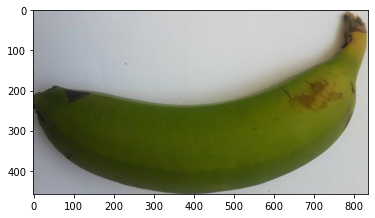

In [35]:
image = plt.imread("dataset_saranya2021/Green/g001.jpg")
result = seg_model.predict(image)[0]
xyxy = result.boxes.xyxy[0].numpy().astype(int)
plt.imshow(image[xyxy[1]:xyxy[3], xyxy[0]:xyxy[2] ])